<a href="https://colab.research.google.com/github/Anderson-Andre-P/Uber-Data-Analysis/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Anderson André Pereira Eleutério

**Matrícula:** 015642

**Tipo de algoritmo designado:** Classificação

**1.** Classificação é um problema onde quero classificar diferentes tipos de dados.

Em outras pelavras, dados de entrada são classificados de acordo com parâmetros estabelecidos a fim de obter dados de saída classificados.

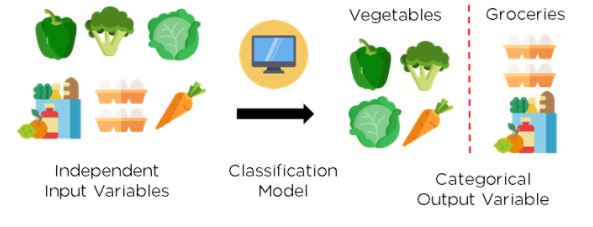

No caso deste dataset eu quis classificar os dados para prever qual categoria é mais utilizada em cada dia da semana.

# **0. Importando Bibliotecas**

Importando as biblioteca necessárias:

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import make_regression
from sklearn.datasets import load_digits

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from google.colab import files

# **1. Carregando os Dados**

Carregando e exibindo o banco de dados:


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# uploaded = files.upload()

In [ ]:
uri = "/content/uber.xlsx"

In [ ]:
df = pd.read_excel(uri)
df.head()

,Data da solicitação (local),Hora da solicitação (local),Serviço,Distância (mi),Duração (min),Grupo,Valor da transação em BRL (com tributos)
0,2020-01-18,01:33:00,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,11:19:00,Travel | UberX,2.25,12,--,8.79
2,2020-02-12,17:42:00,Travel | VIP,4.19,29,--,12.09
3,2020-02-13,04:49:00,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,07:57:00,Travel | Comfort,22.72,46,Geral,74.95


Verificando a quantidade de elementos no banco de dados:

In [ ]:
df.shape

(43642, 7)

Verificando a quantidade de dados vazios no BD:

In [ ]:
df.isna().sum()

Data da solicitação (local)                 0
Hora da solicitação (local)                 0
Serviço                                     0
Distância (mi)                              0
Duração (min)                               0
Grupo                                       0
Valor da transação em BRL (com tributos)    0
dtype: int64

Visualizando informações de cada coluna do BD:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data da solicitação (local)               43642 non-null  datetime64[ns]
 1   Hora da solicitação (local)               43642 non-null  object        
 2   Serviço                                   43642 non-null  object        
 3   Distância (mi)                            43642 non-null  object        
 4   Duração (min)                             43642 non-null  object        
 5   Grupo                                     43642 non-null  object        
 6   Valor da transação em BRL (com tributos)  43642 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,Valor da transação em BRL (com tributos)
count,43642.000000
mean,33.316943
std,30.611027
min,1.490000
25%,14.970000
50%,24.900000
75%,40.530000
max,573.810000


In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43637    False
43638    False
43639    False
43640    False
43641    False
Length: 43642, dtype: bool

In [ ]:
corr = df.corr()

Renomeando as colunas para facilitar a manipulação dos dados:

In [ ]:
df.rename(columns = {'Data da solicitação (local)': 'data_solicitacao',
                    'Hora da solicitação (local)': 'hora_solicitacao', 'Serviço': 'categoria',
                    'Distância (mi)': 'distancia', 'Duração (min)': 'duracao', 'Grupo': 'grupo', 
                    'Valor da transação em BRL (com tributos)': 'preco'}, inplace = True)
df.head()

,data_solicitacao,hora_solicitacao,categoria,distancia,duracao,grupo,preco
0,2020-01-18,01:33:00,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,11:19:00,Travel | UberX,2.25,12,--,8.79
2,2020-02-12,17:42:00,Travel | VIP,4.19,29,--,12.09
3,2020-02-13,04:49:00,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,07:57:00,Travel | Comfort,22.72,46,Geral,74.95


Com o banco carregado, é interessante fazer uma rápida descrição dos dados: 

*   data_solicitacao: data de solicitação do serviço de acordo com o fuso horário local
*   hora_solicitacao: hora de solicitação do serviço de acordo com o fuso horário local
*   categoria: categoria do uber
*   distancia: distância percorrida na corrida [mi]
*   duracao: duração da corrida [min]
*   grupo: grupo do colaborador ("diretores" ou "geral")
*   preco: valor da corrida [R$]

# **2. Preparando os Dados**

Levantar algumas informações básicas do dataframe:

Tamanho do dataset:

In [ ]:
df.shape

(43642, 7)

Quantidade de nulos:

In [ ]:
df.isna().sum()

data_solicitacao    0
hora_solicitacao    0
categoria           0
distancia           0
duracao             0
grupo               0
preco               0
dtype: int64

Tipo dos dados:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_solicitacao  43642 non-null  datetime64[ns]
 1   hora_solicitacao  43642 non-null  object        
 2   categoria         43642 non-null  object        
 3   distancia         43642 non-null  object        
 4   duracao           43642 non-null  object        
 5   grupo             43642 non-null  object        
 6   preco             43642 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.3+ MB


Na célula anterior, é possível observar que o tipo de dados de algumas colunas retornou diferente do esperado. Dessa forma, faremos algumas manipulações no banco para resolver essa questão.

Convertendo a coluna de distância em decimal:

In [ ]:
# df['distancia'] = df['distancia'].astype(float)

O erro do comando anterior indica que existe algum registro estranho na coluna "distancia". Assim, primeiro será necessário lidar com esse erro.

Verificando a representatividade dais linhas com erro em relação a amostra de dados:

In [ ]:
print(df[df['distancia'] == "--"].shape[0]*100/df.shape[0],'%')

1.3633655652811512 %


Como a quantidade de linhas com entradas ruins representa uma parcela muito pequena da amostra, iremos descartar esses dados:

In [ ]:
df.drop(df[df['distancia'] == "--"].index, inplace = True)

Verificando o resultado no tamanho do banco de dados:

In [ ]:
df.shape

(43047, 7)

Executando novamente o comando de conversão para a coluna "distancia":

In [ ]:
df['distancia'] = df['distancia'].astype(float)

Convertendo a coluna de "duração" para inteiro:

In [ ]:
df['duracao'] = df['duracao'].astype(int)

No resultado do comando "head" realizado anteriormente, é possível notar que a coluna "grupo" também possui valores que devemos tratar. Novamente, vamos verificar a representatividade dessa massa:

In [ ]:
print(df[(df['grupo'] != 'Geral') & (df['grupo'] != 'Diretores')].shape[0]*100/df.shape[0],'%')

18.600599344902083 %


Como o percentual de ocorrências discriminado acima é muito elevado, iremos supor que o "grupo" dessas entradas é "Geral":

In [ ]:
df['grupo'] = df['grupo'].replace('--', 'Geral')

In [ ]:
df.drop(columns = 'hora_solicitacao', inplace = True)

Verificando o resultado final:

In [ ]:
df.head()

,data_solicitacao,categoria,distancia,duracao,grupo,preco
0,2020-01-18,Travel | UberX,10.18,21,Diretores,29.38
1,2020-01-18,Travel | UberX,2.25,12,Geral,8.79
2,2020-02-12,Travel | VIP,4.19,29,Geral,12.09
3,2020-02-13,Travel | UberX,12.41,29,Geral,28.46
4,2020-02-13,Travel | Comfort,22.72,46,Geral,74.95


# **3. Enriquecendo os Dados**

Como não iremos incluir nenhuma informação relativa a feriados, é mais interessante ter as datas em dias da semana do que em formato corrido:

In [ ]:
df['dia_semana'] = df['data_solicitacao'].dt.day_name()
df.head()

,data_solicitacao,categoria,distancia,duracao,grupo,preco,dia_semana
0,2020-01-18,Travel | UberX,10.18,21,Diretores,29.38,Saturday
1,2020-01-18,Travel | UberX,2.25,12,Geral,8.79,Saturday
2,2020-02-12,Travel | VIP,4.19,29,Geral,12.09,Wednesday
3,2020-02-13,Travel | UberX,12.41,29,Geral,28.46,Thursday
4,2020-02-13,Travel | Comfort,22.72,46,Geral,74.95,Thursday


Excluindo a coluna "data_solicitacao":

In [ ]:
df.drop(columns = 'data_solicitacao', inplace = True)
df.head()

,categoria,distancia,duracao,grupo,preco,dia_semana
0,Travel | UberX,10.18,21,Diretores,29.38,Saturday
1,Travel | UberX,2.25,12,Geral,8.79,Saturday
2,Travel | VIP,4.19,29,Geral,12.09,Wednesday
3,Travel | UberX,12.41,29,Geral,28.46,Thursday
4,Travel | Comfort,22.72,46,Geral,74.95,Thursday


Considerando também que o maior diferencial entre as categorias do Uber é o ticket médio [R$ / mi], vamos criar essa variável

In [ ]:
df['ticket_medio'] = df['preco'] / df['distancia']
df.head()

,categoria,distancia,duracao,grupo,preco,dia_semana,ticket_medio
0,Travel | UberX,10.18,21,Diretores,29.38,Saturday,2.886051
1,Travel | UberX,2.25,12,Geral,8.79,Saturday,3.906667
2,Travel | VIP,4.19,29,Geral,12.09,Wednesday,2.885442
3,Travel | UberX,12.41,29,Geral,28.46,Thursday,2.293312
4,Travel | Comfort,22.72,46,Geral,74.95,Thursday,3.298856


Antes de excluirmos as colunas "preco" e "distancia", é importante passarmos pela etapa de "análise dos dados" para verificar a integridade da coluna "ticket_medio" criada.

# **4. Analisando os Dados**

Começaremos essa etapa com uma análise descritiva dos dados numéricos:

In [ ]:
df.describe()

,distancia,duracao,preco,ticket_medio
count,43047.000000,43047.000000,43047.000000,4.304700e+04
mean,9.244175,26.328385,33.714128,inf
std,8.813901,20.490758,30.632266,NaN
min,0.000000,0.000000,3.950000,5.571587e-01
25%,3.300000,13.000000,15.230000,2.901199e+00
50%,6.910000,21.000000,24.920000,3.776786e+00
75%,12.100000,34.000000,41.030000,5.404336e+00
max,136.550000,447.000000,573.810000,inf


Pelo retorno anterior, podemos ver a ocorrência de dois problemas: outliers na massa de dados e valores originais prejudicando a variável calculada "ticket_medio".

Começando pelo dado "ticket_medio", iremos verificar a ocorrências de distâncias nulas que retornam valores "inf" para a métrica calculada:

In [ ]:
df[df['distancia'] == 0]

,categoria,distancia,duracao,grupo,preco,dia_semana,ticket_medio
893,Travel | UberX,0.0,0,Geral,9.00,Thursday,inf
894,Travel | UberX,0.0,0,Geral,9.00,Thursday,inf
2334,Travel | UberX,0.0,1,Geral,9.32,Thursday,inf
2535,Travel | UberX,0.0,5,Geral,5.35,Thursday,inf
3853,Travel | UberX,0.0,0,Geral,7.36,Friday,inf
11471,Travel | UberX,0.0,0,Geral,22.77,Monday,inf
34792,Travel | UberX,0.0,3,Geral,24.93,Thursday,inf
37136,Travel | Comfort,0.0,0,Geral,10.74,Monday,inf
37231,Travel | UberX,0.0,36,Geral,19.15,Tuesday,inf
37295,Travel | UberX,0.0,36,Geral,28.84,Tuesday,inf


Confirmamos nossa teoria e, para o projeto em questão, excluiremos essas entradas:

In [ ]:
df.drop(df[df['distancia'] == 0].index, inplace = True)

E, agora, podemos excluir as colunas "distancia" e "preço":

In [ ]:
df.drop(columns = ['distancia', 'preco'], inplace = True)
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio
0,Travel | UberX,21,Diretores,Saturday,2.886051
1,Travel | UberX,12,Geral,Saturday,3.906667
2,Travel | VIP,29,Geral,Wednesday,2.885442
3,Travel | UberX,29,Geral,Thursday,2.293312
4,Travel | Comfort,46,Geral,Thursday,3.298856


Verificando o tamanho do banco de dados resultante:

In [ ]:
df.shape

(43036, 5)

Obs.: mudança de 43047 linhas para 43036 (redução inferior a 1%)

Para a avaliação dos outliers da massa de dados, utilizaremos elementos gráficos.

Criando uma lista com as colunas numéricas:

In [ ]:
cols_num = ['duracao', 'ticket_medio']

Plotando os gráficos de boxplot:



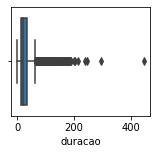

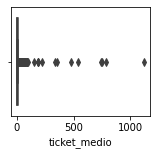

In [ ]:
for i in cols_num:
    plt.figure(figsize = (2.5,2))
    sns.boxplot(x = df[i])
    plt.show()

Após a análise dos gráficos acima, foi realizada uma verificação da fonte de dados para confirmar a sua integridade. A princípio, todos os registros parecem corretos e, por isso, os outliers serão mantidos nesse momento.

# **5. Visualizando os Dados**

Agora que as primeiras análises foram efetuadas, começaremos a parte de "visualização dos dados" para checarmos se alguma outra manipulação é necessária.

Criando uma lista para as variáveis categóricas:

In [ ]:
cols_cat = ['categoria', 'grupo', 'dia_semana']

Plotando a quantidade de entradas das colunas categóricas:

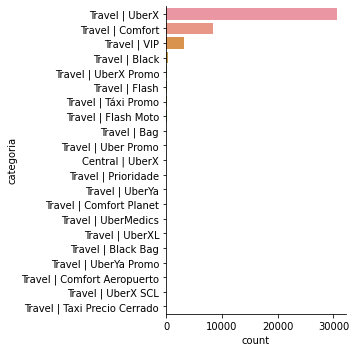

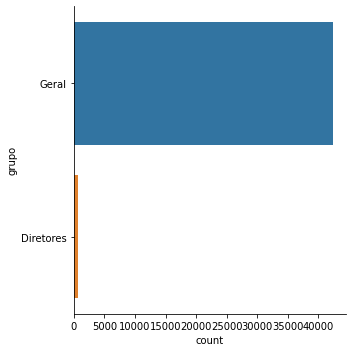

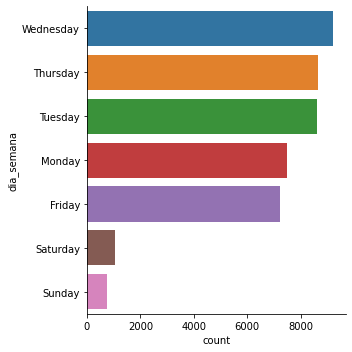

In [ ]:
for i in cols_cat:
    fig = sns.catplot(data = df, y = i, kind = 'count', order = df[i].value_counts().index)
    ax = fig.facet_axis(0,0)
    for i in ax.containers:
        labels = [v.get_width() for v in i]

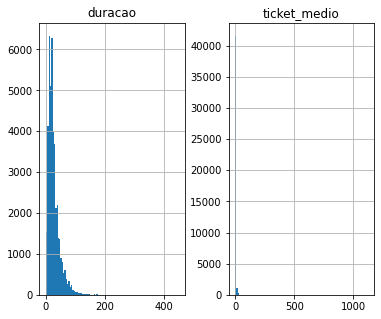

In [ ]:
df.hist(bins=100, figsize=(6,5))
plt.show()

Como a quantidade de categorias Uber é bem desbalanceada, iremos realizar uma simplificação dessa coluna para tentar não enviesar o modelo de classificação:

In [ ]:
df['categoria'] = df['categoria'].replace(['Travel | UberX', 'Travel | VIP', 'Travel | Comfort',
                                            'Travel | UberMedics', 'Travel | Uber Promo', 'Travel | Bag',
                                            'Travel | Black', 'Travel | UberX Promo', 'Central | UberX',
                                            'Travel | Flash', 'Travel | Táxi Promo', 'Travel | Flash Moto',
                                            'Travel | Black Bag', 'Travel | Prioridade',
                                            'Travel | Comfort Planet', 'Travel | UberYa Promo',
                                            'Travel | UberYa', 'Travel | UberXL', 'Travel | Comfort Aeropuerto',
                                            'Travel | UberX SCL', 'Travel | Taxi Precio Cerrado'],
                                            ['x', 'x', 'comfort', 'outros', 'outros', 'outros', 'black', 'x',
                                            'x', 'flash', 'outros', 'flash', 'black', 'outros', 'comfort',
                                            'outros', 'outros', 'outros', 'outros', 'x', 'outros'])

Verificando o resultado:

In [ ]:
# ax = plt.subplots()

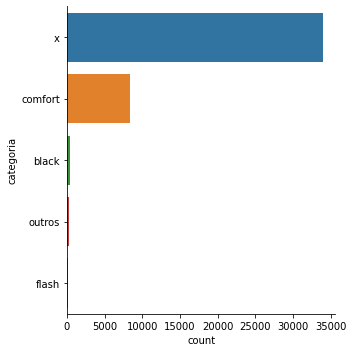

In [ ]:
fig = sns.catplot(data = df, y = 'categoria', kind = 'count', order = df['categoria'].value_counts().index)
ax = fig.facet_axis(0,0)
for i in ax.containers:
    labels = [v.get_width() for v in i]
plt.show()

Apesar da simplificação da variável target, o resultado ainda não foi satisfatório. Por isso, utilizaremos apenas uma amostra das categorias x e comfort para balancear o banco de dados e realizar uma modelagem mais justa.

In [ ]:
df_classe_x = df[df['categoria'] == 'x'].sample(2000)
df_classe_comfort = df[df['categoria'] == 'comfort'].sample(500)
df_classe_black = df[df['categoria'] == 'black']
df_classe_outros = df[df['categoria'] == 'outros']
df_classe_flash = df[df['categoria'] == 'flash']
df = pd.concat([df_classe_x, df_classe_comfort, df_classe_black, df_classe_outros, df_classe_flash])

Checando o resultado:


In [ ]:
df.shape

(3253, 5)

Antes de passarmos para a análise visual das colunas numéricas, é importante lembrar que elas contêm muitos outliers. Esses valores atípicos podem distorcer uma distribuição de probabilidade e dificultar o dimensionamento dos dados usando normalização, pois a média calculada e o desvio padrão serão distorcidos pela presença desses dados.

Uma abordagem para padronizar variáveis de entrada na presença de outliers é retirá-los do cálculo da média e do desvio padrão e, em seguida, usar os valores calculados para normalizar as variáveis.

Isso é chamado de "normalização robusta" ou "dimensionamento de dados robusto".

# **5.1. Preparando o Banco de Dados para a Normalização Robusta**

Performando one-hot encoding para a coluna grupo (categórica):

In [ ]:
df_grupo = pd.DataFrame(OneHotEncoder().fit_transform(df[['grupo']]).toarray())
df_grupo.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


Verificando o df

In [ ]:
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio
27129,x,6,Geral,Tuesday,5.574230
24875,x,14,Geral,Thursday,2.934256
9854,x,17,Geral,Wednesday,3.731207
14763,x,5,Geral,Friday,17.500000
16545,x,19,Geral,Monday,4.054767


Juntando o dataset grupo com o original:

In [ ]:
df = pd.concat([df.reset_index(), df_grupo], axis = 1)
df.drop(columns = ['index'], inplace = True)
df.head()

,categoria,duracao,grupo,dia_semana,ticket_medio,0,1
0,x,6,Geral,Tuesday,5.574230,0.0,1.0
1,x,14,Geral,Thursday,2.934256,0.0,1.0
2,x,17,Geral,Wednesday,3.731207,0.0,1.0
3,x,5,Geral,Friday,17.500000,0.0,1.0
4,x,19,Geral,Monday,4.054767,0.0,1.0


Dropando a coluna "grupo" e a coluna "1" e renomeando a coluna "0":

In [ ]:
df.drop(columns = ['grupo', 1], inplace = True)
df.rename(columns = {0: 'diretores'}, inplace = True)
df.head()

,categoria,duracao,dia_semana,ticket_medio,diretores
0,x,6,Tuesday,5.574230,0.0
1,x,14,Thursday,2.934256,0.0
2,x,17,Wednesday,3.731207,0.0
3,x,5,Friday,17.500000,0.0
4,x,19,Monday,4.054767,0.0


Para a coluna "dia_semana", iremos utilizar o método "get_dummies":

In [ ]:
df = pd.get_dummies(df, columns = ['dia_semana'], prefix = '', prefix_sep = '')
df.head()

,categoria,duracao,ticket_medio,diretores,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,x,6,5.574230,0.0,0,0,0,0,0,1,0
1,x,14,2.934256,0.0,0,0,0,0,1,0,0
2,x,17,3.731207,0.0,0,0,0,0,0,0,1
3,x,5,17.500000,0.0,1,0,0,0,0,0,0
4,x,19,4.054767,0.0,0,1,0,0,0,0,0


**5.2. Normalização Robusta**

Realizando a divisão do banco de dados em variável dependentes, independente, treino e teste:

In [ ]:
x = df.iloc[:, 0:-1]
y = df["ticket_medio"]

In [ ]:
le = preprocessing.LabelEncoder()
x['categoria']  = le.fit_transform(x['categoria'])
x['duracao']  = le.fit_transform(x['duracao'])
x['diretores']  = le.fit_transform(x['diretores'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
print(X_train.shape)

(2439, 10)


In [ ]:
print(X_test.shape)

(814, 10)


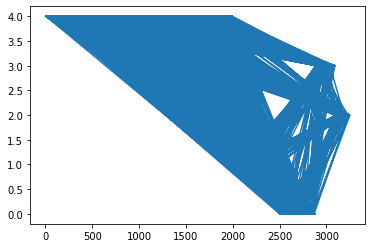

In [ ]:
plt.plot(X_train.iloc[:, 0])
plt.show()

In [ ]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

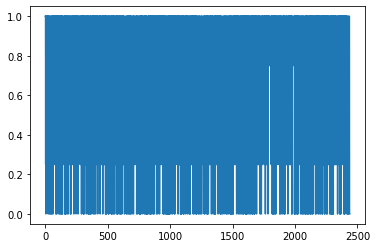

In [ ]:
plt.plot(X_train[:, 0])
plt.show()

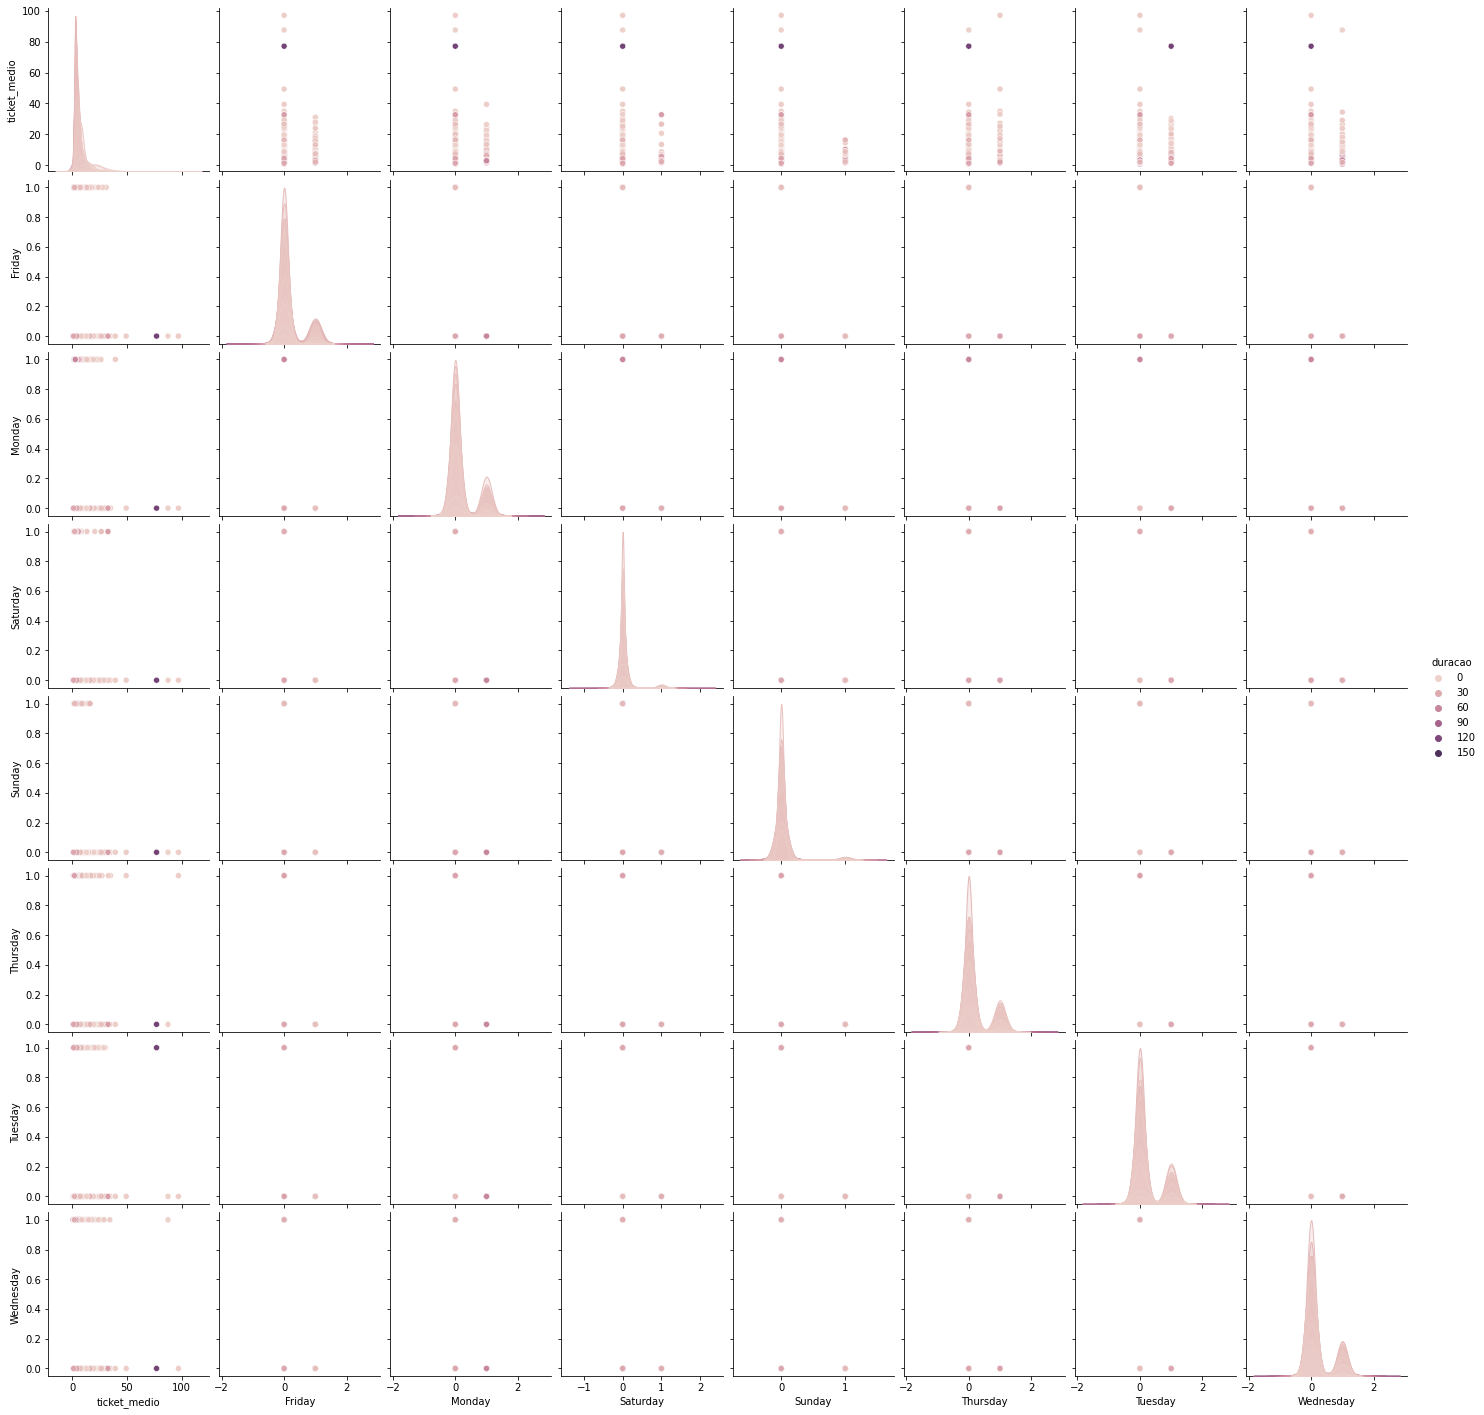

In [ ]:
sns.pairplot(df.drop("diretores", axis=1), hue='duracao');

In [ ]:
reducer = umap.UMAP()

In [ ]:
df_data_uber = df[
    [
        "duracao",
        "diretores",
        "Monday",
        "Tuesday", 
        "Wednesday", 
        "Thursday", 
        "Friday", 
        "Saturday", 
        "Sunday",
    ]
].values
scaled_df_data_uber = StandardScaler().fit_transform(df_data_uber)

In [ ]:
embedding = reducer.fit_transform(scaled_df_data_uber)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   categoria     3253 non-null   object 
 1   duracao       3253 non-null   int64  
 2   ticket_medio  3253 non-null   float64
 3   diretores     3253 non-null   float64
 4   Friday        3253 non-null   uint8  
 5   Monday        3253 non-null   uint8  
 6   Saturday      3253 non-null   uint8  
 7   Sunday        3253 non-null   uint8  
 8   Thursday      3253 non-null   uint8  
 9   Tuesday       3253 non-null   uint8  
 10  Wednesday     3253 non-null   uint8  
dtypes: float64(2), int64(1), object(1), uint8(7)
memory usage: 124.0+ KB


In [ ]:
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#         c=[sns.color_palette()[x] for x in df.Monday.map({"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6})])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Uber dataset', fontsize=24);

In [ ]:
df.head()

,categoria,duracao,ticket_medio,diretores,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,x,6,5.574230,0.0,0,0,0,0,0,1,0
1,x,14,2.934256,0.0,0,0,0,0,1,0,0
2,x,17,3.731207,0.0,0,0,0,0,0,0,1
3,x,5,17.500000,0.0,1,0,0,0,0,0,0
4,x,19,4.054767,0.0,0,1,0,0,0,0,0


In [ ]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

print(regr.predict(X_test))

[ 7.10428561  3.43623344  3.43623344 15.7403153   3.43623344  6.89105963
  3.43623344  7.15274749  6.69325996  3.43623344  3.43623344  6.89105963
  3.43623344  3.43623344  3.43623344  3.43623344  3.43623344  7.15274749
  3.43623344  3.43623344  3.43623344  3.43623344  3.43623344  3.43623344
  6.81160348  3.43623344  3.43623344  3.43623344  3.43623344  3.43623344
  3.43623344 16.7073011   3.43623344  3.43623344  3.43623344  3.43623344
  3.50409636  6.89105963  3.43623344  3.43623344  7.10428561  3.43623344
  7.15274749  3.43623344  3.43623344  7.10428561  3.43623344  7.15274749
  3.43623344  3.43623344 14.68929171  3.43623344  7.15274749  3.43623344
  3.43623344  3.43623344  3.43623344  7.10428561  3.43623344  3.43623344
  6.89105963  3.43623344  3.43623344  7.15274749  3.43623344  3.43623344
  3.43623344  3.43623344  3.43623344 10.53515514  3.43623344  3.43623344
  7.15274749  7.15274749  7.10428561  3.43623344  7.10428561  3.43623344
  3.43623344  3.43623344  7.15274749  3.43623344  3

In [ ]:
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)

print("R2 teste: ", r2_score(y_pred_test, y_test))
print("mean absolute error: ", mean_absolute_error(y_pred_test, y_test))

R2 teste:  0.3331059890259479
mean absolute error:  0.9695910414011488


In [ ]:
raw_df = pd.read_excel(uri, skiprows=22)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

Não consegui identificar o erro que impede a execução correta das duas células abaixo...

In [ ]:
# def dataProcessing(X, y, scaler_tipo=1):
#     if scaler_tipo == 1:
#         scaler = QuantileTransformer(n_quantiles=30, random_state=0)
#     elif scaler_tipo == 2:
#         scaler = StandardScaler()
#     else: 
#         print("Scaler inválido")
#         return 0, 0, 0, 0
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state= 42)

#     X_train = scaler.fit_transform(X_train)
#     x_test = scaler.transform(X_test)

#     return X_train, X_test, y_train, y_test

# X_train, X_test, y_train, y_test = dataProcessing(x, y, scaler_tipo=1)

In [ ]:
# def training(scaler, test_tam, X, y):
#     X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_tam)

#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)

#     model.fit(X_train, y_train)

#     y_prediction = model.predict(X_train)

#     result = accuracy_score(y_train, y_prediction)

# for classificador in [1, 2, 5, 7, 11]:
#     for scaler in [10, 15, 20, 1, 3]:
#         for teste in [0.1, 0.2, 0.25, 0.3, 0.4]:
#             training(scaler, teste, x, y)